In [8]:
import endpoint
import pandas as pd
import matplotlib.pyplot as plt


def get_moral_df(msg, img_description=None, en=False, model=None):
    # en=Trueの場合はChatCompletionを使って翻訳する
    if en:
        if img_description:
            res_msg, res_data = endpoint.get_moderation_after_translate(
                msg, img_description=img_description, model=model
            )
        else:
            res_msg, res_data = endpoint.get_moderation_after_translate(
                msg, model=model
            )
    else:
        if img_description:
            res_msg, res_data = endpoint.get_moderation(
                msg, img_description=img_description
            )
        else:
            res_msg, res_data = endpoint.get_moderation(msg)
    categoriy_flags = res_data["categories"]
    categoriy_scores = res_data["category_scores"]
    # コメントアウトを外すとJSONの中身を確認できる
    # display(categoriy_flags)
    # display(categoriy_scores)

    # 別にdfである必要はないが、可視化のためにdfにしておく
    df_f = pd.DataFrame(pd.json_normalize(categoriy_flags))
    df_s = pd.DataFrame(pd.json_normalize(categoriy_scores))
    return (res_msg, df_f, df_s)

In [4]:
# めちゃくちゃ重いので注意
img_description = endpoint.explain_image(
    "https://pbs.twimg.com/media/F0LyrTeaMAAxtAj?format=jpg&name=large"
)
print(img_description)

In this image, a Japanese man is depicted wearing a tan shirt and pants. He is sitting at a table with a cup of coffee. Additionally, there is a person wearing sneakers and a man standing on the street wearing pants. There is also a young man with short hair sitting on a bench. A woman in a tan outfit is standing on a sidewalk, and another person is wearing a striped shirt and tan pants. Finally, a man in a striped shirt is standing in front of a building.


In [12]:
msg = "中身長…？普通に低身長ですやん"

msg_jp, df_jp_f, df_jp_s = get_moral_df(msg)
msg_jp_img, df_jp_img_f, df_jp_img_s = get_moral_df(
    msg, img_description=img_description
)
# 翻訳はここで実行されるたびに結果が変わるので注意（ChatGPTくんにやらせているため）
msg_en, df_en_f, df_en_s = get_moral_df(msg, en=True, model="gpt-4")
msg_en_img, df_en_img_f, df_en_img_s = get_moral_df(
    msg, img_description=img_description, en=True, model="gpt-4"
)

In [13]:
display(df_jp_f)
display(df_jp_s)
display(df_jp_img_f)
display(df_jp_img_s)
display(df_en_f)
display(df_en_s)
display(df_en_img_f)
display(df_en_img_s)

,sexual,hate,harassment,self-harm,sexual/minors,hate/threatening,violence/graphic,self-harm/intent,self-harm/instructions,harassment/threatening,violence
0,False,False,False,False,False,False,False,False,False,False,False


,sexual,hate,harassment,self-harm,sexual/minors,hate/threatening,violence/graphic,self-harm/intent,self-harm/instructions,harassment/threatening,violence
0,0.000183,0.004567,0.015661,0.000026,6.830773e-07,0.000002,0.000009,0.000035,0.000026,0.000026,0.000018


,sexual,hate,harassment,self-harm,sexual/minors,hate/threatening,violence/graphic,self-harm/intent,self-harm/instructions,harassment/threatening,violence
0,False,False,False,False,False,False,False,False,False,False,False


,sexual,hate,harassment,self-harm,sexual/minors,hate/threatening,violence/graphic,self-harm/intent,self-harm/instructions,harassment/threatening,violence
0,0.000009,0.000105,0.000403,1.208371e-07,7.552696e-10,0.000006,9.727911e-08,1.667407e-09,7.499111e-10,0.000005,4.624495e-07


,sexual,hate,harassment,self-harm,sexual/minors,hate/threatening,violence/graphic,self-harm/intent,self-harm/instructions,harassment/threatening,violence
0,False,False,False,False,False,False,False,False,False,False,False


,sexual,hate,harassment,self-harm,sexual/minors,hate/threatening,violence/graphic,self-harm/intent,self-harm/instructions,harassment/threatening,violence
0,0.000002,0.002613,0.075366,1.600482e-07,1.729866e-08,7.249603e-09,0.000003,1.119535e-07,6.423548e-07,0.000011,7.695263e-07


,sexual,hate,harassment,self-harm,sexual/minors,hate/threatening,violence/graphic,self-harm/intent,self-harm/instructions,harassment/threatening,violence
0,False,False,False,False,False,False,False,False,False,False,False


,sexual,hate,harassment,self-harm,sexual/minors,hate/threatening,violence/graphic,self-harm/intent,self-harm/instructions,harassment/threatening,violence
0,0.000005,0.000073,0.000161,5.973461e-08,1.121829e-09,0.000001,1.686524e-07,2.242646e-09,8.901899e-10,7.370683e-07,1.796360e-07


Original:中身長…？普通に低身長ですやん
Translated:How tall…? You're quite short, aren't you?
Image description:In this image, a Japanese man is depicted wearing a tan shirt and pants. He is sitting at a table with a cup of coffee. Additionally, there is a person wearing sneakers and a man standing on the street wearing pants. There is also a young man with short hair sitting on a bench. A woman in a tan outfit is standing on a sidewalk, and another person is wearing a striped shirt and tan pants. Finally, a man in a striped shirt is standing in front of a building.


ValueError: not enough values to unpack (expected 4, got 2)

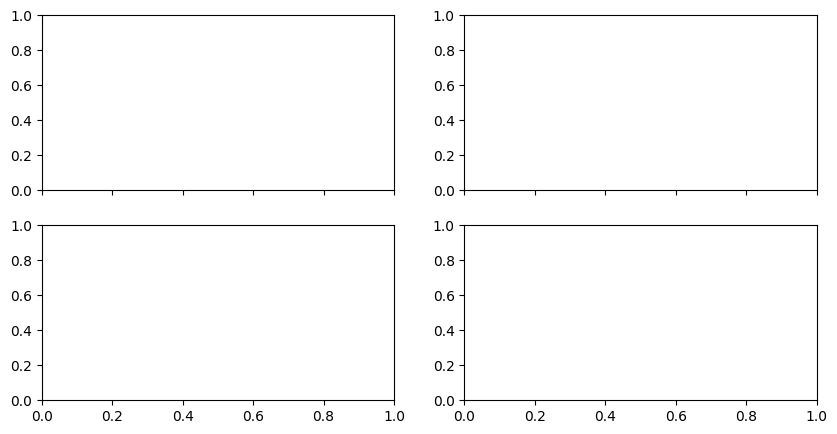

In [14]:
print(f"Original:{msg_jp}")
print(f"Translated:{msg_en}")
print(f"Image description:{img_description}")

# TODO 指数表記が見づらいのでわかりやすい表記にする
fig, (ax1, ax2, ax3, ax4) = plt.subplots(2, 2, sharex="all", figsize=(10, 5))

ax1.barh(df_jp_s.columns, df_jp_s.iloc[0])
ax1.set_xticklabels(df_jp_s.iloc[0])
ax1.set_title("Japanese")

ax2.barh(df_en_s.columns, df_en_s.iloc[0])
ax2.set_xticklabels(df_en_s.iloc[0])
ax2.set_title("English")

ax3.barh(df_jp_img_s.columns, df_jp_img_s.iloc[0])
ax3.set_xticklabels(df_jp_img_s.iloc[0])
ax3.set_title("Japanese with image")

ax4.barh(df_en_img_s.columns, df_en_img_s.iloc[0])
ax4.set_xticklabels(df_en_img_s.iloc[0])
ax4.set_title("English with image")

plt.show()